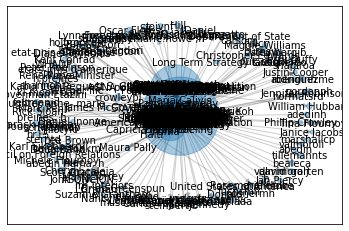

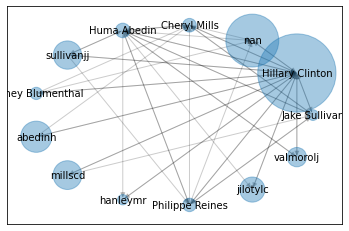

In [12]:
# -*- coding:utf-8 -*-
# use PageRank analysis Hillary mail
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

# load data
emails = pd.read_csv('./data/Hillary/Emails.csv')

# read the file alias
file = pd.read_csv('./data/Hillary/Aliases.csv')
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']]  = row['PersonId']

# read person name file
file = pd.read_csv('./data/Hillary/Persons.csv')
persons = {}

for index, row in file.iterrows():
    persons[row['Id']] = row['Name']

# change the alias
def unify_name(name):
    # name is lower
    name = str(name).lower()

    # remove the ',' and after '@'
    name = name.replace(',','').split('@')[0]

    # change the alias
    if name in aliases.keys():
        return persons[aliases[name]]
    return name

# draw node network image
def show_graph(graph, layout = 'spring_layout'):
    # use Spring layout
    if layout == 'circular_layout':
        positions = nx.circular_layout(graph)
    else:
        positions = nx.spring_layout(graph)
    
    # set the node size in the network graph, the size is related to the pagerank value,because the pagerank value is vaery small, *20000 is required
    nodesize = [x['pagerank'] *20000 for v, x in graph.nodes(data=True)]

    # set the edge size
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]

    # draw node
    nx.draw_networkx_nodes(graph, positions, node_size = nodesize, alpha = 0.4)

    # draw edge
    nx.draw_networkx_edges(graph, positions, node_size = edgesize, alpha = 0.2)

    # set node label
    nx.draw_networkx_labels(graph, positions, font_size = 10)

    # output all person network of Hillary mails
    plt.show()

# Normalize the name of the sender and recipient
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)

# set the weight of times equal to the number of emails sent
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

# format (from, to), weight => from, to, weight
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]

# create a directed graph
graph = nx.DiGraph()

# set directed graph path and weight(from, to, weight)
graph.add_weighted_edges_from(edges_weights)

# Cal the PR value of each node (person) and use it as the pagerank attribute of the node
pagerank = nx.pagerank(graph)

# Use the pagerank value as an attribute of the node
nx.set_node_attributes(graph, name = 'pagerank', values = pagerank)

# draw network graph
show_graph(graph)

# Streamline the complete map
# Set the threshold of the PR value and filter the important core nodes that r greater than the threshold
pagerank_threshold = 0.005

# Copy a calculated network diagram
small_graph = graph.copy()

# Cut off the nodes whose PR value is less than pagerank_threshold
for n, p_rank in graph.nodes(data = True):
    if p_rank['pagerank']  < pagerank_threshold:
        small_graph.remove_node(n)

# Draw a network diagram and use the circular_layout to make the filtered points form a circle

show_graph(small_graph, 'circular_layout')




